# Speech Emotion Recognition

* You can download the dataset from below link.

https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess

In [157]:
#Import libraries that we need
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from IPython import display
import os 
import sys

from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tqdm.notebook import tqdm



from warnings import filterwarnings
filterwarnings('ignore')

# Sample Audio

In [6]:
#Load audio file
sample_audio_path='SOUNDS/OAF_angry//OAF_back_angry.wav'

In [7]:
display.Audio(sample_audio_path)

In [8]:
sample_audio_data,sample_audio_sr=librosa.load(sample_audio_path)

In [9]:
sample_audio_data

array([-1.0417719e-05, -1.9059131e-04, -2.8630142e-04, ...,
        1.6136018e-04,  1.0805293e-04,  0.0000000e+00], dtype=float32)

In [13]:
print('Sample Audio Data Shape :{}'.format(sample_audio_data.shape))

Sample Audio Data Shape :(33936,)


In [11]:
sample_audio_sr

22050

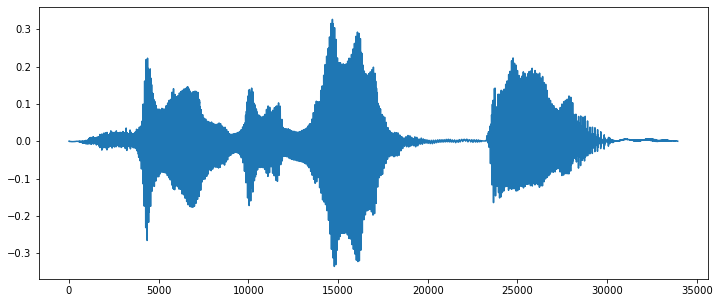

In [16]:
plt.figure(figsize=(12,5));
plt.plot(sample_audio_data)
plt.show()

In [23]:
sample_mfcc=librosa.feature.mfcc(y=sample_audio_data,sr=sample_audio_sr,n_mfcc=20)
sample_mfcc

array([[-6.0137427e+02, -5.5190540e+02, -4.6683530e+02, ...,
        -5.1530896e+02, -5.5635718e+02, -5.9161469e+02],
       [ 1.0804397e+01, -2.1255810e+01, -4.1044716e+01, ...,
         4.1096745e+01,  3.3453522e+01,  1.7801588e+01],
       [ 1.0647860e+01,  1.2420494e+01,  1.1008299e+01, ...,
        -2.3168514e+01, -1.9267701e+00,  8.1957045e+00],
       ...,
       [ 7.4852939e+00,  1.4504513e+01,  2.0409618e+01, ...,
        -9.0721875e-02,  1.9116620e+00,  6.5001082e+00],
       [ 7.1370888e+00,  5.8844643e+00,  6.6676021e+00, ...,
        -8.1303682e+00, -2.5019503e+00,  3.9787290e+00],
       [ 6.7228117e+00,  8.3622932e+00,  1.0263592e+01, ...,
        -2.7507145e+00, -9.2555344e-02,  1.3321830e+00]], dtype=float32)

In [24]:
sample_mfcc.shape

(20, 67)

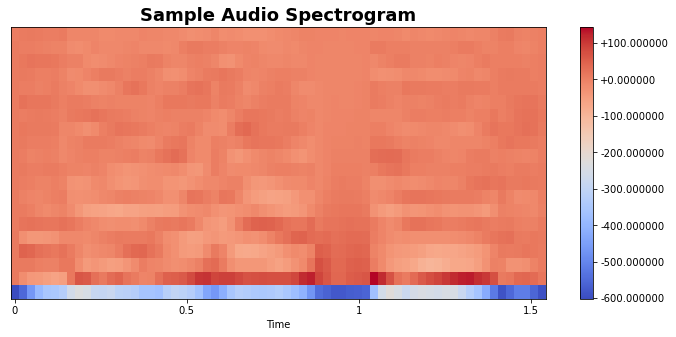

In [27]:
plt.figure(figsize=(12,5))
librosa.display.specshow(data=sample_mfcc,x_axis='time',sr=sample_audio_sr)
plt.colorbar(format="%+2f")
plt.title('Sample Audio Spectrogram',fontsize=18,fontweight='bold')
plt.show()

In [58]:
librosa.stft(sample_audio_data) #Short-time Fourier transform (STFT).

array([[-4.57490325e-01+0.00000000e+00j, -1.06543338e+00+0.00000000e+00j,
        -6.64408684e-01+0.00000000e+00j, ...,
         2.29438138e+00+0.00000000e+00j,  1.35585582e+00+0.00000000e+00j,
         6.94055378e-01+0.00000000e+00j],
       [ 1.86165050e-01-2.90290892e-01j,  6.74024463e-01-3.28474492e-01j,
         5.57724833e-01+7.30182707e-01j, ...,
        -9.31411684e-01-7.11004317e-01j, -7.46620059e-01-1.90871716e-01j,
        -2.98119754e-01-4.30916518e-01j],
       [-2.90172398e-02+1.58586487e-01j,  1.34880722e-01+3.21643949e-01j,
        -4.56045508e-01-7.40610957e-01j, ...,
        -4.96940970e-01+4.41679537e-01j,  2.69000888e-01-7.19197690e-02j,
        -6.65324479e-02+1.60332680e-01j],
       ...,
       [ 9.93140748e-06-1.21035214e-06j, -2.04042699e-05-6.92250978e-07j,
         4.11993497e-05+9.58090459e-05j, ...,
        -6.41160841e-06-9.14414159e-06j, -7.50448316e-06-1.40602583e-06j,
         1.53210985e-05+1.27040039e-05j],
       [-7.91985622e-06-1.15166529e-06j,  1.

# Load the Dataset

In [63]:
DATASET_PATH='SOUNDS'

In [64]:
os.listdir(DATASET_PATH)

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [65]:
df=pd.DataFrame()
sound_paths,labels=[],[]
class_names=[]

for folder in os.listdir(DATASET_PATH):
    for file in os.listdir(os.path.join(DATASET_PATH,folder)):
        sound_paths.append(os.path.join(os.path.join(DATASET_PATH,folder),file))
        
        label=file.split('_')[-1]
        label=label.split('.')[0]
        label=label.lower()
       
        labels.append(label)


df['path']=sound_paths
df['label']=labels

In [66]:
df

,path,label
0,SOUNDS\OAF_angry\OAF_back_angry.wav,angry
1,SOUNDS\OAF_angry\OAF_bar_angry.wav,angry
2,SOUNDS\OAF_angry\OAF_base_angry.wav,angry
3,SOUNDS\OAF_angry\OAF_bath_angry.wav,angry
4,SOUNDS\OAF_angry\OAF_bean_angry.wav,angry
...,...,...
2795,SOUNDS\YAF_sad\YAF_witch_sad.wav,sad
2796,SOUNDS\YAF_sad\YAF_yearn_sad.wav,sad
2797,SOUNDS\YAF_sad\YAF_yes_sad.wav,sad
2798,SOUNDS\YAF_sad\YAF_young_sad.wav,sad


In [67]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

# Exploratory Data Analysis

In [94]:
def waveplot(data,sr,label):
    plt.figure(figsize=(12,5))
    plt.title(label,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,label):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(12,5))
    plt.title(label,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar(format='%+2f')
    plt.show()
    

In [95]:
df[df['label']=='angry'].iloc[0]

path     SOUNDS\OAF_angry\OAF_back_angry.wav
label                                  angry
Name: 0, dtype: object

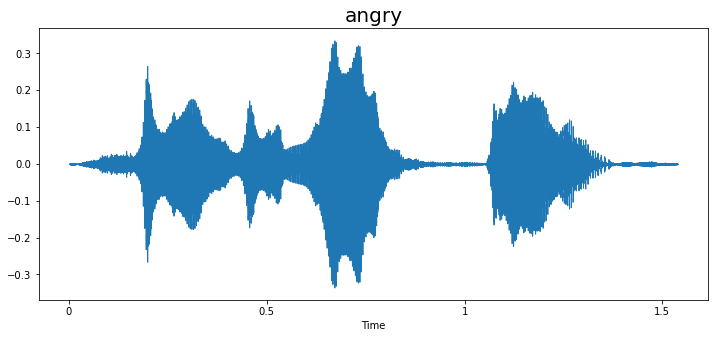

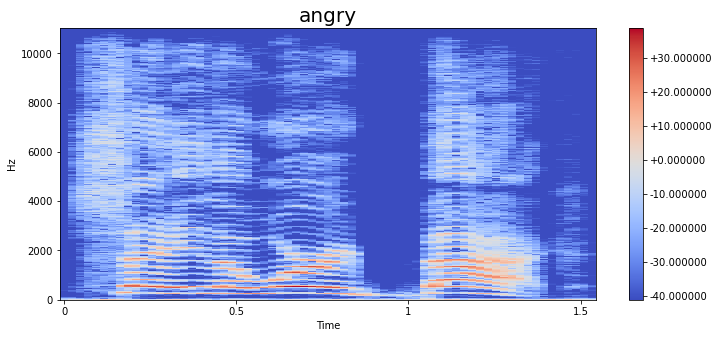

In [98]:
audio='SOUNDS\OAF_angry\OAF_back_angry.wav'
label=df[df['label']=='angry'].iloc[0][1]
data,sr=librosa.load(audio)
waveplot(data,sr,label)
spectogram(data,sr,label)

In [100]:
df[df['label']=='fear'].iloc[0]

path     SOUNDS\OAF_Fear\OAF_back_fear.wav
label                                 fear
Name: 400, dtype: object

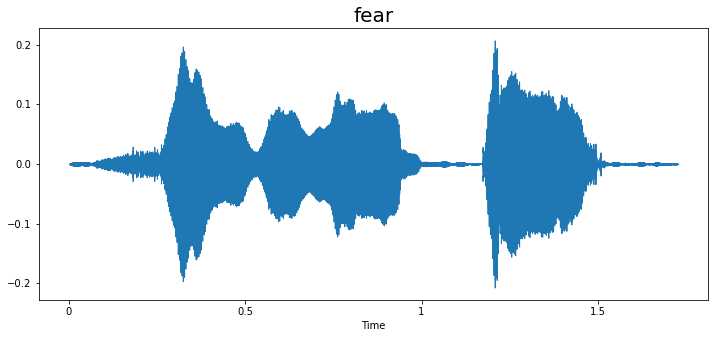

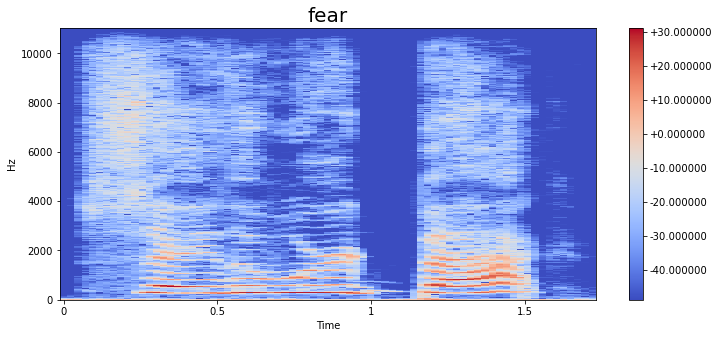

In [103]:
audio='SOUNDS\OAF_Fear\OAF_back_fear.wav'
label=df[df['label']=='fear'].iloc[0][1]
data,sr=librosa.load(audio)
waveplot(data,sr,label)
spectogram(data,sr,label)
display.Audio(audio)

In [107]:
df[df['label']=='disgust'].iloc[0]

path     SOUNDS\OAF_disgust\OAF_back_disgust.wav
label                                    disgust
Name: 200, dtype: object

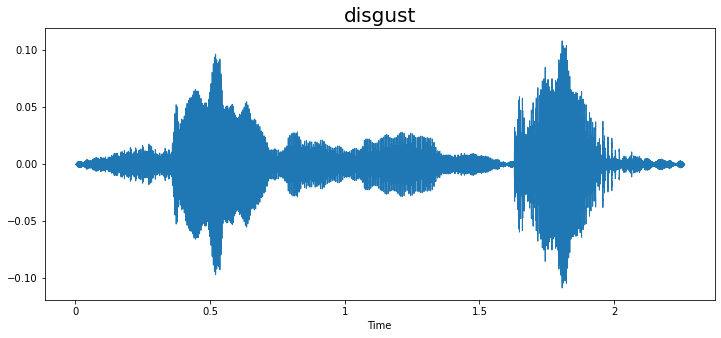

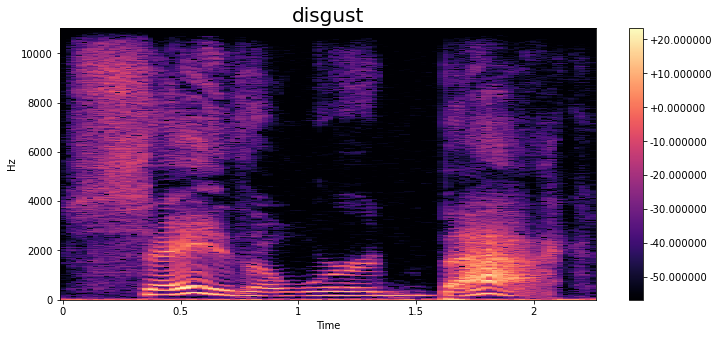

In [108]:
audio='SOUNDS\OAF_disgust\OAF_back_disgust.wav'
label=df[df['label']=='disgust'].iloc[0][1]
data,sr=librosa.load(audio)
waveplot(data,sr,label)
spectogram(data,sr,label)
display.Audio(audio)

In [112]:
df[df['label']=='happy'].iloc[0]

path     SOUNDS\OAF_happy\OAF_back_happy.wav
label                                  happy
Name: 600, dtype: object

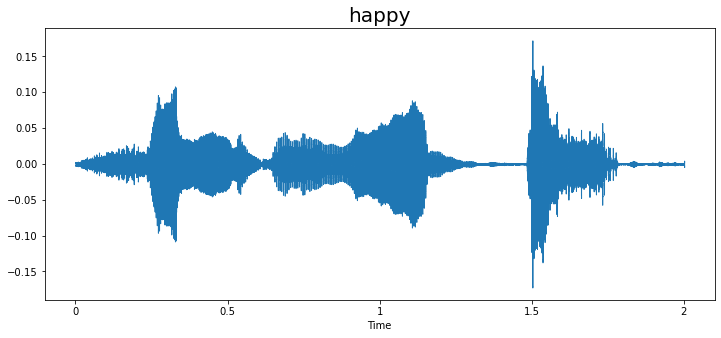

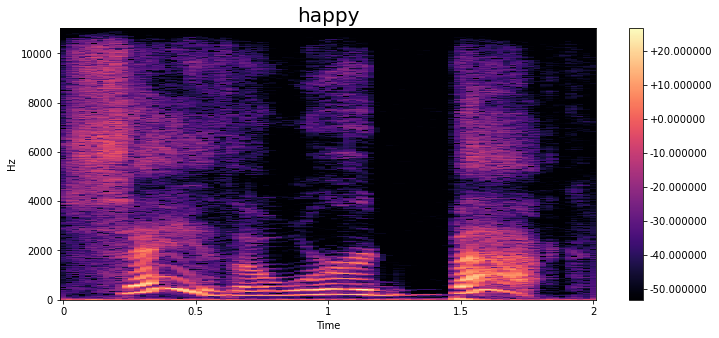

In [113]:
audio='SOUNDS\OAF_happy\OAF_back_happy.wav'
label=df[df['label']=='happy'].iloc[0][1]
data,sr=librosa.load(audio)
waveplot(data,sr,label)
spectogram(data,sr,label)
display.Audio(audio)

In [114]:
df[df['label']=='neutral'].iloc[0]

path     SOUNDS\OAF_neutral\OAF_back_neutral.wav
label                                    neutral
Name: 800, dtype: object

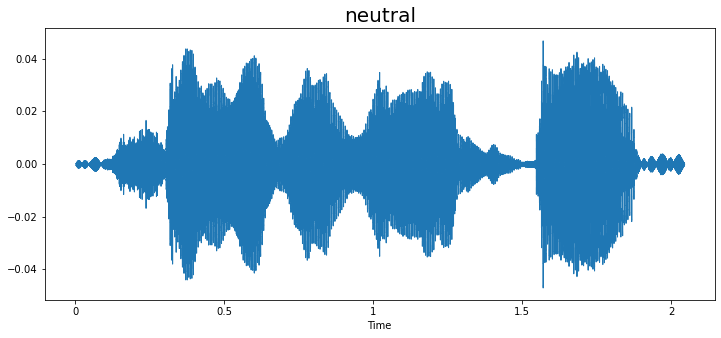

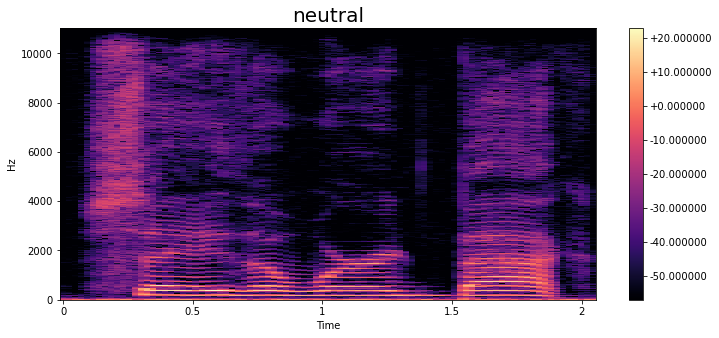

In [115]:
audio='SOUNDS\OAF_neutral\OAF_back_neutral.wav'
label=df[df['label']=='neutral'].iloc[0][1]
data,sr=librosa.load(audio)
waveplot(data,sr,label)
spectogram(data,sr,label)
display.Audio(audio)

In [116]:
df[df['label']=='ps'].iloc[0]

path     SOUNDS\OAF_Pleasant_surprise\OAF_back_ps.wav
label                                              ps
Name: 1000, dtype: object

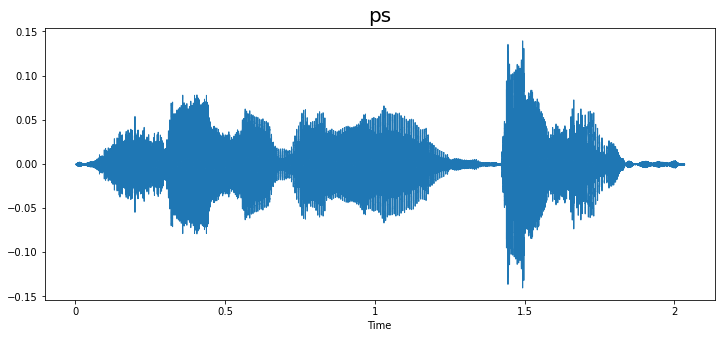

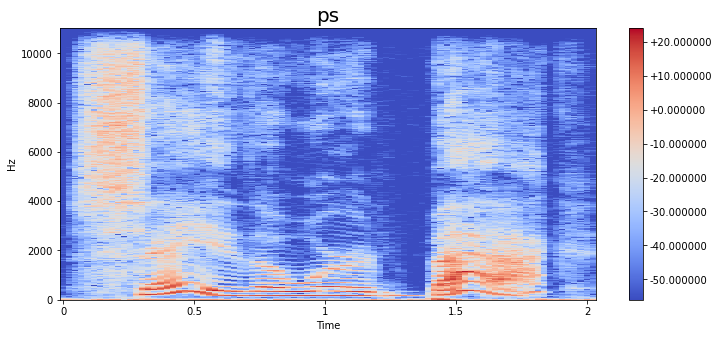

In [119]:
audio='SOUNDS\OAF_Pleasant_surprise\OAF_back_ps.wav'
label=df[df['label']=='ps'].iloc[0][1]
data,sr=librosa.load(audio)
waveplot(data,sr,label)
spectogram(data,sr,label)
display.Audio(audio)

In [120]:
df[df['label']=='sad'].iloc[0]

path     SOUNDS\OAF_Sad\OAF_back_sad.wav
label                                sad
Name: 1200, dtype: object

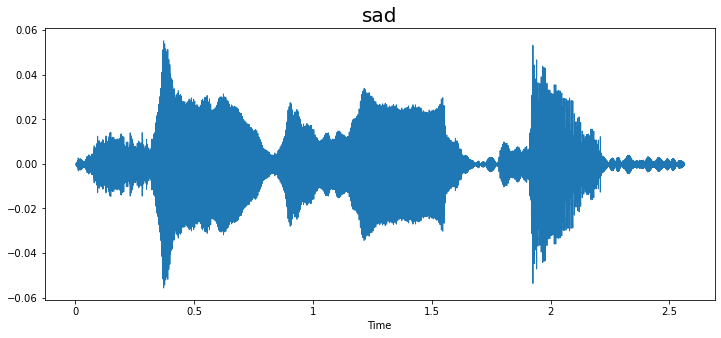

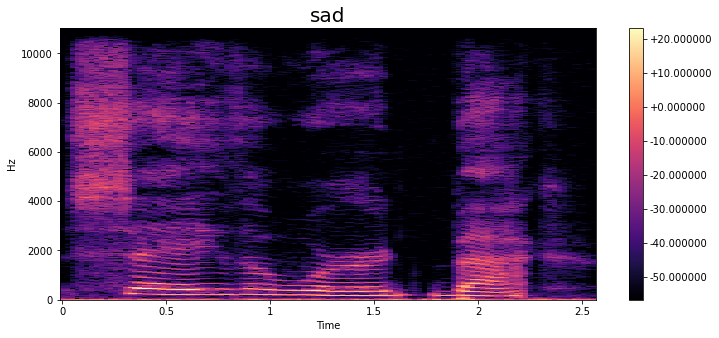

In [122]:
audio='SOUNDS\OAF_sad\OAF_back_sad.wav'
label=df[df['label']=='sad'].iloc[0][1]
data,sr=librosa.load(audio)
waveplot(data,sr,label)
spectogram(data,sr,label)
display.Audio(audio)

# Feature Extraction

In [141]:
def extract_mfcc(file):
    data,sr=librosa.load(file,res_type='kaiser_fast')
    mfcc_feature=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=50)
    mfcc_feature_scaled=np.mean(mfcc_feature.T,axis=0)
    
    return mfcc_feature_scaled

In [143]:
extracted_features=[]

for index,row in df.iterrows():
    file_name=row['path']
    data=extract_mfcc(file_name)
    label=row['label']
    
    extracted_features.append([data,label])

In [151]:
df_extracted_features=pd.DataFrame(extracted_features,columns=['feature','label'])
df_extracted_features

,feature,label
0,"[-387.35645, 58.00525, -23.070848, -6.4950075,...",angry
1,"[-448.57208, 70.98286, -8.170729, -14.899887, ...",angry
2,"[-407.019, 33.07975, -11.734395, 6.1423593, -7...",angry
3,"[-387.9774, 58.727615, -17.779144, -7.8950744,...",angry
4,"[-402.43118, 57.398098, -2.0817034, 13.913458,...",angry
...,...,...
2795,"[-396.6531, 68.68635, 27.67157, 49.48823, -8.8...",sad
2796,"[-409.28275, 83.23681, 19.076742, 46.272194, -...",sad
2797,"[-376.129, 73.64153, 30.505957, 48.876934, -11...",sad
2798,"[-427.49304, 75.27528, 23.589348, 43.188694, -...",sad


In [152]:
X=np.array(df_extracted_features['feature'].tolist())
y=np.array(df_extracted_features['label'].tolist())

In [154]:
X.shape

(2800, 50)

In [155]:
y.shape

(2800,)

# Encoding Labels

In [158]:
lbe=LabelEncoder()
y=to_categorical(lbe.fit_transform(y))
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Splitting into Train and Test Datasets

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [163]:
print('Train Features Shape : {}'.format(X_train.shape))
print('Train Labels Shape : {}'.format(y_train.shape))
print('Test Features Shape : {}'.format(X_test.shape))
print('Test Labels Shape : {}'.format(y_test.shape))


Train Features Shape : (2240, 50)
Train Labels Shape : (2240, 7)
Test Features Shape : (560, 50)
Test Labels Shape : (560, 7)


# Construct Model with LSTM

In [166]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=64,return_sequences=False,input_shape=(50,1)))
model.add(tf.keras.layers.Dense(units=64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
#Prediction Layer
model.add(tf.keras.layers.Dense(units=7,activation=tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 25,671
Trainable params: 25,671
Non-traina

In [168]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])

In [169]:
epochs=100
batch_size=32
history=model.fit(X_train,y_train,steps_per_epoch=len(X_train)//batch_size
                  ,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/100
70/70 [==============================] - 2s 17ms/step - loss: 1.6451 - accuracy: 0.3759 - val_loss: 0.9944 - val_accuracy: 0.6393
Epoch 2/100
70/70 [==============================] - 1s 14ms/step - loss: 0.7893 - accuracy: 0.6888 - val_loss: 0.4719 - val_accuracy: 0.8036
Epoch 3/100
70/70 [==============================] - 1s 14ms/step - loss: 0.4504 - accuracy: 0.8268 - val_loss: 0.3057 - val_accuracy: 0.8821
Epoch 4/100
70/70 [==============================] - 1s 13ms/step - loss: 0.3218 - accuracy: 0.8813 - val_loss: 0.2806 - val_accuracy: 0.8929
Epoch 5/100
70/70 [==============================] - 1s 14ms/step - loss: 0.2804 - accuracy: 0.8951 - val_loss: 0.2527 - val_accuracy: 0.8821
Epoch 6/100
70/70 [==============================] - 1s 13ms/step - loss: 0.2823 - accuracy: 0.9076 - val_loss: 0.2042 - val_accuracy: 0.9179
Epoch 7/100
70/70 [==============================] - 1s 15ms/step - loss: 0.1913 - accuracy: 0.9272 - val_loss: 0.1772 - val_accuracy: 0.9286
Epoch 

70/70 [==============================] - 1s 14ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.1539 - val_accuracy: 0.9589
Epoch 59/100
70/70 [==============================] - 1s 14ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.1159 - val_accuracy: 0.9732
Epoch 60/100
70/70 [==============================] - 1s 14ms/step - loss: 0.0332 - accuracy: 0.9911 - val_loss: 0.1038 - val_accuracy: 0.9714
Epoch 61/100
70/70 [==============================] - 1s 13ms/step - loss: 0.0364 - accuracy: 0.9902 - val_loss: 0.1133 - val_accuracy: 0.9732
Epoch 62/100
70/70 [==============================] - 1s 13ms/step - loss: 0.0105 - accuracy: 0.9973 - val_loss: 0.1313 - val_accuracy: 0.9768
Epoch 63/100
70/70 [==============================] - 1s 14ms/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.1075 - val_accuracy: 0.9839
Epoch 64/100
70/70 [==============================] - 1s 14ms/step - loss: 0.0086 - accuracy: 0.9982 - val_loss: 0.1081 - val_accuracy: 0.9786
Epoch 65/100

In [184]:
model.save('speech_emotion_recog_lstm.h5')

In [170]:
results=pd.DataFrame(history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,1.645130,0.375893,0.994440,0.639286
1,0.789285,0.688839,0.471852,0.803571
2,0.450374,0.826786,0.305685,0.882143
3,0.321753,0.881250,0.280551,0.892857
4,0.280385,0.895089,0.252697,0.882143
...,...,...,...,...
95,0.015215,0.994643,0.100356,0.983929
96,0.037947,0.989286,0.084997,0.976786
97,0.104824,0.977232,0.061340,0.982143
98,0.027920,0.993750,0.060014,0.989286


# Plot the Model Result

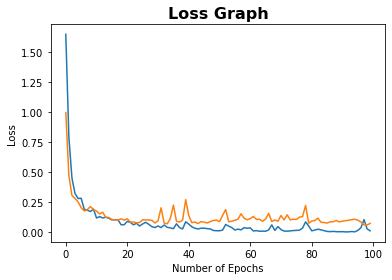

In [182]:
epochs=range(0,100)

plt.title('Loss Graph',fontsize=16,fontweight='bold')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
loss=results['loss']
val_loss=results['val_loss']
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.show()

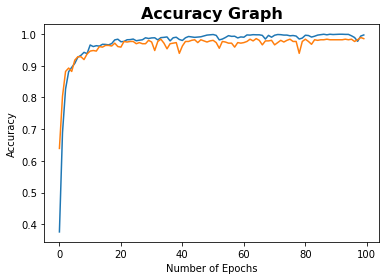

In [183]:
plt.title('Accuracy Graph',fontsize=16,fontweight='bold')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
loss=results['accuracy']
val_loss=results['val_accuracy']
plt.plot(epochs,loss,label='Training Accuracy')
plt.plot(epochs,val_loss,label='Validation Accuracy')
plt.show()

# Construct Another Model

In [178]:
model2=tf.keras.models.Sequential()

model2.add(tf.keras.layers.Dense(units=512,activation=tf.nn.relu,input_shape=(50,)))
model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(units=512,activation=tf.nn.relu))
model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(units=256,activation=tf.nn.relu))
model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(7,activation=tf.nn.softmax))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               26112     
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 7)                

In [179]:
model2.compile(optimizer=Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

In [180]:
epochs=100
batch_size=32
history2=model2.fit(X_train,y_train,steps_per_epoch=len(X_train)//batch_size
                  ,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 16.2962 - accuracy: 0.1795 - val_loss: 1.7153 - val_accuracy: 0.4554
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 3.7802 - accuracy: 0.1991 - val_loss: 1.7913 - val_accuracy: 0.3429
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 2.3851 - accuracy: 0.2692 - val_loss: 1.7574 - val_accuracy: 0.4089
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 1.8523 - accuracy: 0.3415 - val_loss: 1.5303 - val_accuracy: 0.5179
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 1.5722 - accuracy: 0.4080 - val_loss: 1.1927 - val_accuracy: 0.6786
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 1.2953 - accuracy: 0.5134 - val_loss: 0.8467 - val_accuracy: 0.7661
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 1.0735 - accuracy: 0.5839 - val_loss: 0.6803 - val_accuracy: 0.8268
Epoch 8/100


Epoch 59/100
70/70 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9839 - val_loss: 0.0153 - val_accuracy: 0.9946
Epoch 60/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9906 - val_loss: 0.0182 - val_accuracy: 0.9946
Epoch 61/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.9888 - val_loss: 0.0131 - val_accuracy: 0.9964
Epoch 62/100
70/70 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9915 - val_loss: 0.0132 - val_accuracy: 0.9982
Epoch 63/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9844 - val_loss: 0.0240 - val_accuracy: 0.9929
Epoch 64/100
70/70 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9826 - val_loss: 0.0164 - val_accuracy: 0.9946
Epoch 65/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9866 - val_loss: 0.0289 - val_accuracy: 0.9911
Epoch 

In [185]:
results2=pd.DataFrame(history.history)
results2

,loss,accuracy,val_loss,val_accuracy
0,1.645130,0.375893,0.994440,0.639286
1,0.789285,0.688839,0.471852,0.803571
2,0.450374,0.826786,0.305685,0.882143
3,0.321753,0.881250,0.280551,0.892857
4,0.280385,0.895089,0.252697,0.882143
...,...,...,...,...
95,0.015215,0.994643,0.100356,0.983929
96,0.037947,0.989286,0.084997,0.976786
97,0.104824,0.977232,0.061340,0.982143
98,0.027920,0.993750,0.060014,0.989286


# Plot the Model Result for model2

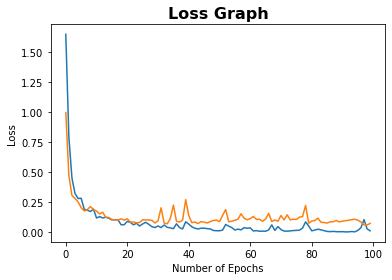

In [186]:
epochs=range(0,100)

plt.title('Loss Graph',fontsize=16,fontweight='bold')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
loss=results2['loss']
val_loss=results2['val_loss']
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.show()

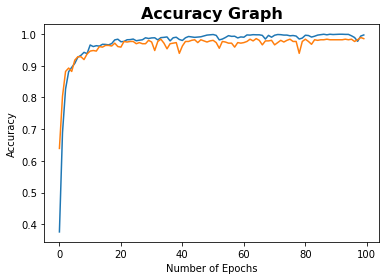

In [187]:
plt.title('Accuracy Graph',fontsize=16,fontweight='bold')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
loss=results2['accuracy']
val_loss=results2['val_accuracy']
plt.plot(epochs,loss,label='Training Accuracy')
plt.plot(epochs,val_loss,label='Validation Accuracy')
plt.show()

# Confusion Matrix

In [209]:
#Firstly,prepare the predicted test values dataset
#When you construct a confusion matrix,matrix does not work with multilabel(one-hot-encoder) type.Use the array as vector.
y_pred_classes=[]
y_pred=model.predict(X_test)
y_pred_classes.append([y_pred[i].argmax() for i in range(len(y_pred))])
y_pred_classes=np.reshape(np.array(y_pred_classes),(y_pred.shape[0],))
y_pred_classes[:10]

array([5, 3, 3, 5, 2, 1, 6, 0, 4, 5], dtype=int64)

In [211]:
y_pred_classes.shape

(560,)

In [214]:
y_test_cm=np.array([np.argmax(y, axis=None, out=None) for y in y_test])
y_test_cm=np.reshape(y_test_cm,(560,))
y_test_cm[:10]

array([5, 3, 3, 5, 2, 1, 6, 0, 4, 5], dtype=int64)

In [215]:
y_test_cm.shape

(560,)

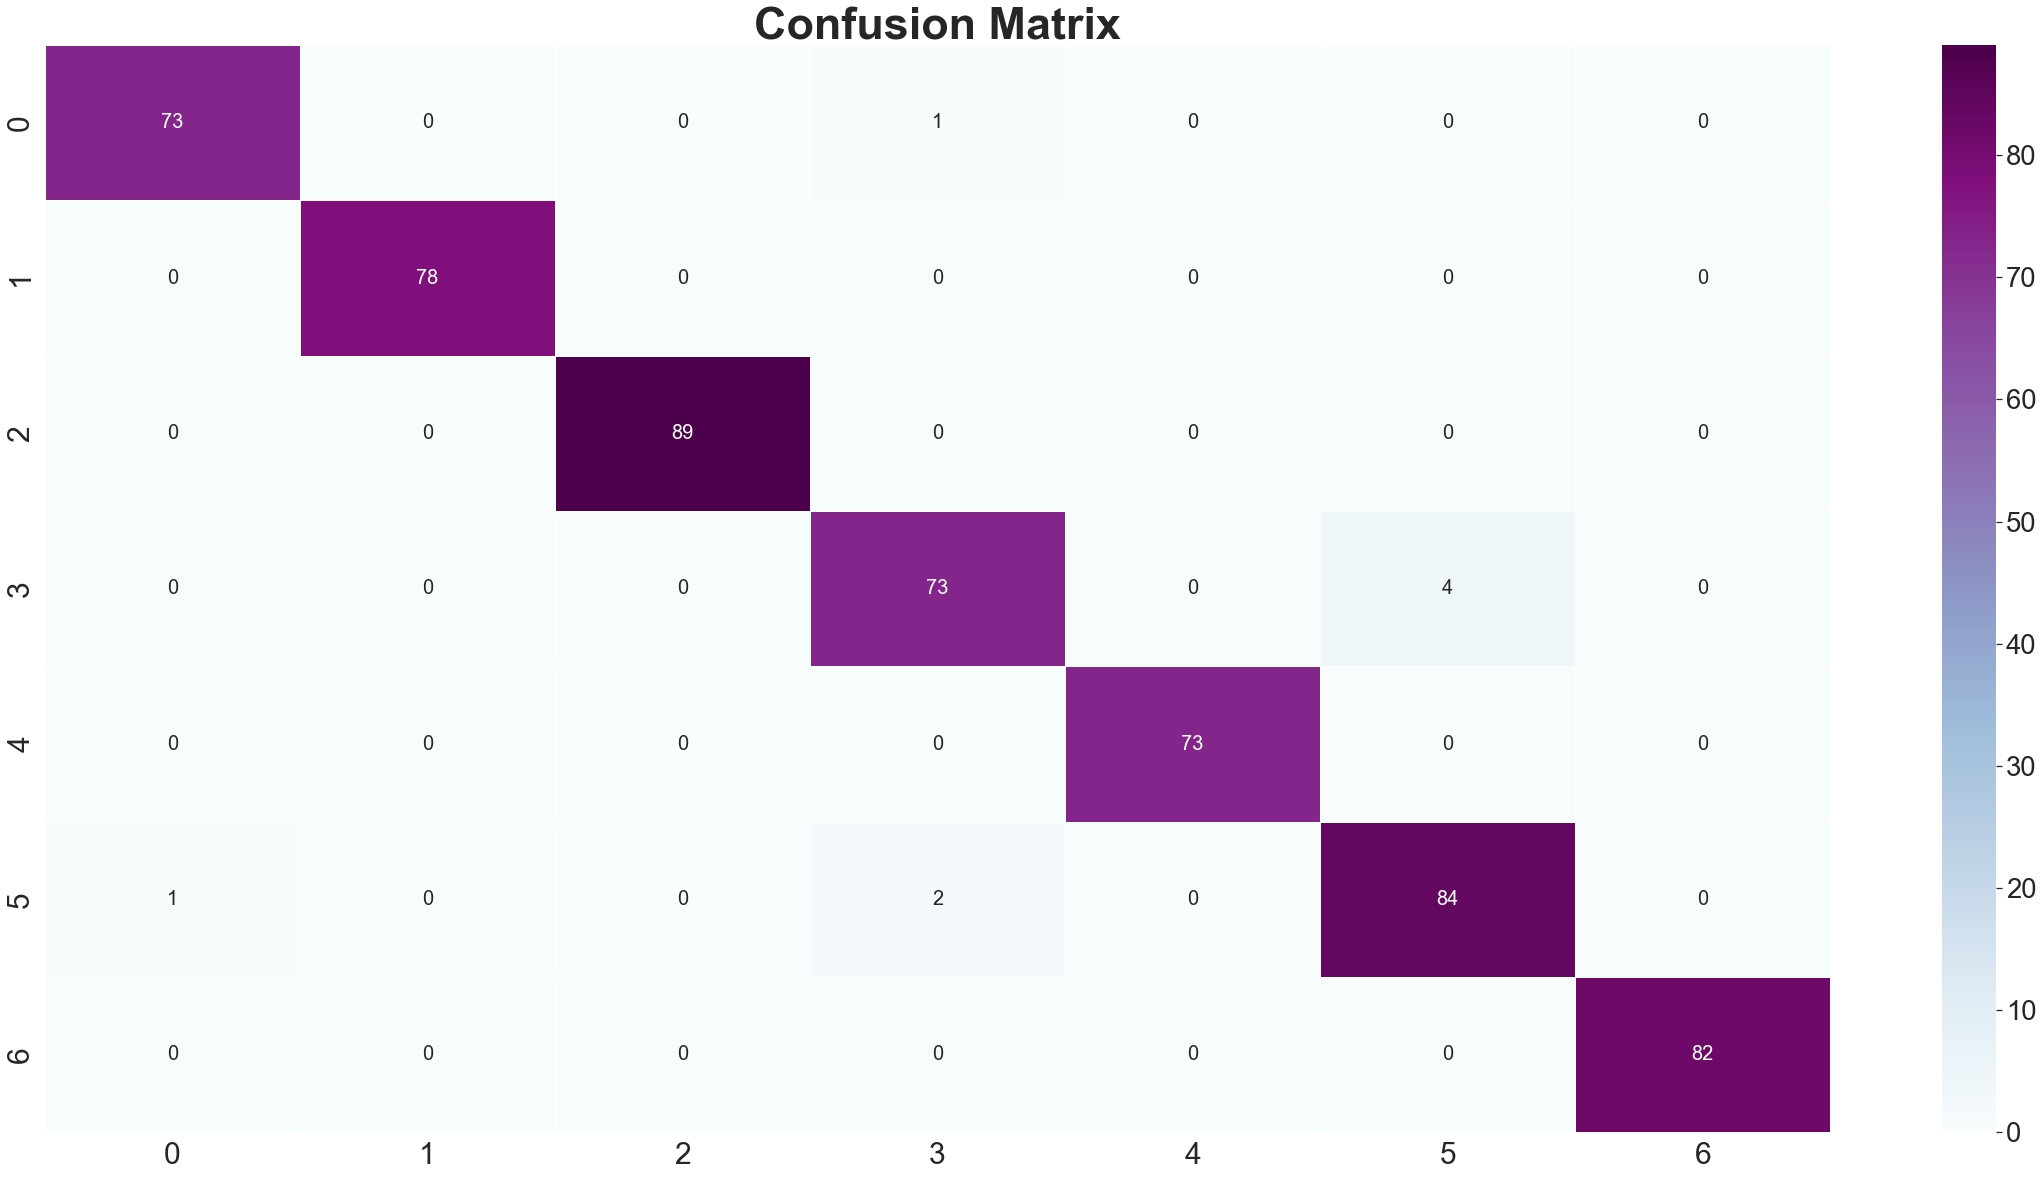

In [217]:
plt.figure(figsize=(40,20));
sns.set(font_scale=2.5)
plt.title(label='Confusion Matrix',fontsize=45,fontweight='bold')
sns.heatmap(confusion_matrix(y_test_cm,y_pred_classes),cmap="BuPu",linewidths=1,annot=True,annot_kws={"fontsize":20},fmt='.0f');
plt.xticks(size=30);
plt.yticks(size=30);

In [230]:
print(classification_report(to_categorical(y_pred_classes),y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        89
           3       0.95      0.96      0.95        76
           4       1.00      1.00      1.00        73
           5       0.97      0.95      0.96        88
           6       1.00      1.00      1.00        82

   micro avg       0.99      0.99      0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560
 samples avg       0.99      0.99      0.99       560



# Prediction

* We'll choose random audio and predict.

In [194]:
df.iloc[255]

path     SOUNDS\OAF_disgust\OAF_hall_disgust.wav
label                                    disgust
Name: 255, dtype: object

In [195]:
path=df.iloc[255][0]
real_label=df.iloc[255][1]

In [196]:
display.Audio(path)

In [197]:
real_label

'disgust'

In [203]:
mfcc_pred=extract_mfcc(path)
mfcc_pred=mfcc_pred.reshape(1,-1)
mfcc_pred.shape

(1, 50)

In [206]:
prediction=model.predict(mfcc_pred).argmax()
prediction #1 ---  disgust

1